<a href="https://colab.research.google.com/github/ManavGuru/Portfolio/blob/master/CSCE_633_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA EXPLORATION

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#IMPORTING THE DATA FROM THE DATASETS.
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from skimage import data, io, filters

path = "/content/drive/My Drive/Homework3_Data/Train_Data.csv"

path3 = "/content/drive/My Drive/Homework3_Data/Validation_Data.csv"
train_data_df = pd.read_csv(path)

validation_data_df = pd.read_csv(path3)

In [0]:
#Creating data arrays
train_labels = train_data_df['emotion']
valid_labels = validation_data_df['emotion']

train_pixels = train_data_df.drop('emotion',axis=1)
train_pixels = train_pixels.to_numpy()

valid_pixels = validation_data_df.drop('emotion',axis=1)
valid_pixels = valid_pixels.to_numpy()

def image_display(i):
  image = train_pixels[i][0]
  shape = (48,48)
  image = [int(k) for k in image.split(' ')]
  image = np.array(image)
  image = image.reshape(shape)
  plt.title(train_labels[i])
  plt.imshow(image)
  plt.show()

In [0]:
#----------------------------TESTTING STUFF
path2 = "/content/drive/My Drive/Homework3_Data/Test_Data.csv"
test_data_df = pd.read_csv(path2)
test_labels = test_data_df['emotion']

test_pixels = test_data_df.drop('emotion',axis=1)
test_pixels = test_pixels.to_numpy()
test_image_array = []
for i in range (len(test_pixels)): 
  temp = test_pixels[i][0]
  temp = [int(k) for k in temp.split(' ')]
  temp = np.array(temp)
  test_image_array.append(temp)

test_image_array = np.array(test_image_array)


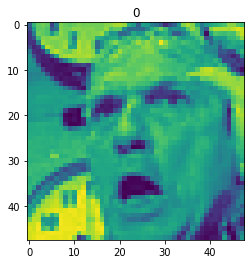

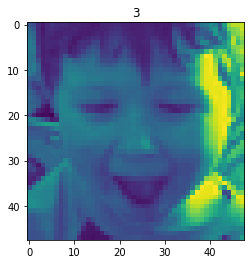

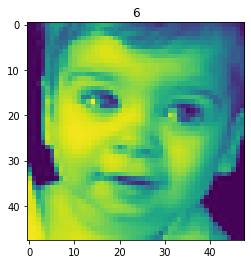

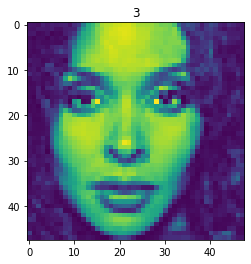

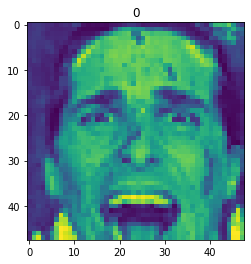

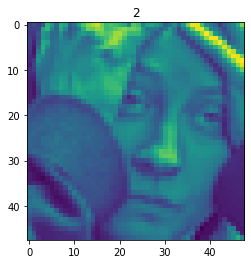

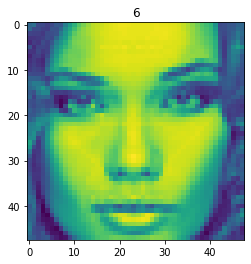

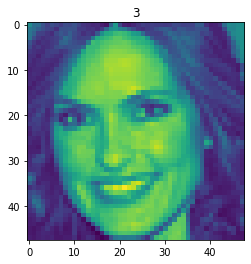

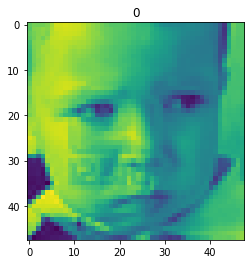

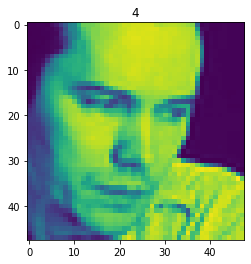

In [5]:
import random
my_randoms=[]
for i in range (10):
    my_randoms.append(random.randrange(1,len(train_pixels),1))
for i in my_randoms: 
  image_display(i)

In [6]:
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0 
count5 = 0 
count6 = 0
for i in range(len(train_labels)):
  if (train_labels[i]==0):
    count0 += 1
  elif(train_labels[i]==1):
    count1 += 1
  elif(train_labels[i]==2):
    count2 += 1
  elif(train_labels[i]==3):
    count3 += 1
  elif(train_labels[i]==4): 
    count4 += 1 
  elif(train_labels[i]==5):
    count5 += 1
  elif(train_labels[i]==6):
    count6 += 1 
  else: 
    print("Oops.")
total = count0+count1+count2+count3+count4+\
        count5+count6
print("\nAngry:   ",count0,"\nDisgust:  ", count1,"\nFear:    ",count2,\
      "\nHappy:   ",count3,"\nSad:     ",count4,"\nSurprise:" \
      , count5,"\nNeutral: " ,count6,"\n_______\nTotal:  ",total)


Angry:    3995 
Disgust:   436 
Fear:     4097 
Happy:    7215 
Sad:      4830 
Surprise: 3171 
Neutral:  4965 
_______
Total:   28709


#FNN


In [0]:
train_image_array = []
for i in range (len(train_pixels)): 
  temp = train_pixels[i][0]
  temp = [int(k) for k in temp.split(' ')]
  temp = np.array(temp)
  train_image_array.append(temp)

In [0]:
valid_image_array = []
for i in range (len(valid_pixels)): 
  temp = valid_pixels[i][0]
  temp = [int(k) for k in temp.split(' ')]
  temp = np.array(temp)
  valid_image_array.append(temp)

In [0]:
train_image_array = np.array(train_image_array)
valid_image_array = np.array(valid_image_array)

In [0]:
from skimage import data, io, filters
#noramlise all the images
train_image_array = (train_image_array / 255) - 0.5
valid_image_array = (valid_image_array / 255) -0.5
test_image_array = (test_image_array / 255) -0.5

# train_image_array = filters.sobel(train_image_array)
# valid_image_array = filters.sobel(valid_image_array)
# test_image_array = filters.sobel(test_image_array)

In [0]:
import warnings 
import keras
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import regularizers


# # Flatten the images into vectors (1D) for feed forward network
# flatten_train_images = train_image_array.reshape((-1, 48*48))
# flatten_test_images = test_image_array.reshape((-1, 48*48))
# flatten_valid_images = valid_image_array.reshape((-1, 48*48))

In [0]:
import time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [0]:
# Evaluate your model's performance on the test data
def model_test(model):
  performance = model.evaluate(valid_image_array, to_categorical(valid_labels))
  print("\nAccuracy on Test samples: {0}".format(performance[1]))

In [0]:
# Compiling the model 
def model_compile(model):
  model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
# Train model
  time_callback = TimeHistory()
  hist = model.fit(train_image_array, to_categorical(train_labels), epochs=10, batch_size=256,callbacks=[time_callback])
  
  plt.plot(hist.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper left')
  plt.show()
  print("\nTotal Training Time is: ", sum(time_callback.times),'s.\n')

  0%|          | 0/25 [00:00<?, ?it/s, best loss: ?]WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










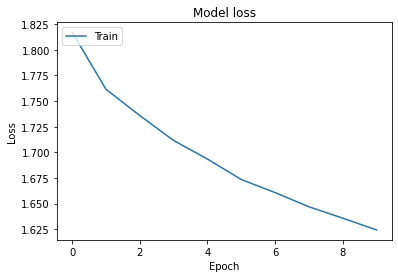

Total Training Time is (s): 
16.47349262237549
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.49703589816733806, 'optimizer': 'sgd'}
Accuracy: 
0.3892449150513261
----------------------------------------------------
  4%|▍         | 1/25 [00:17<06:56, 17.36s/it, best loss: -0.3892449150513261]

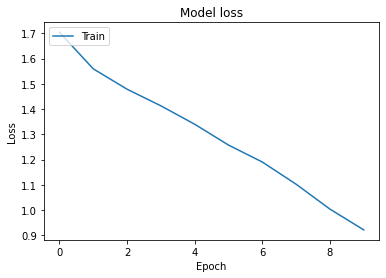

Total Training Time is (s): 
10.896510124206543
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.2547370850455968, 'optimizer': 'Adam'}
Accuracy: 
0.45277235999715865
----------------------------------------------------
  8%|▊         | 2/25 [00:29<06:01, 15.71s/it, best loss: -0.45277235999715865]

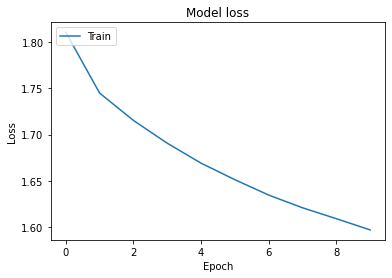

Total Training Time is (s): 
8.562089681625366
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.11898562764305814, 'optimizer': 'sgd'}
Accuracy: 
0.37726386183315946
----------------------------------------------------
 12%|█▏        | 3/25 [00:38<05:03, 13.82s/it, best loss: -0.45277235999715865]

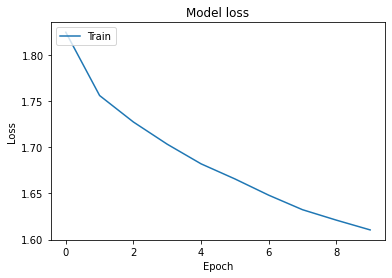

Total Training Time is (s): 
8.550109148025513
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.32199236399662545, 'optimizer': 'sgd'}
Accuracy: 
0.38562273614650383
----------------------------------------------------
 16%|█▌        | 4/25 [00:48<04:22, 12.49s/it, best loss: -0.45277235999715865]

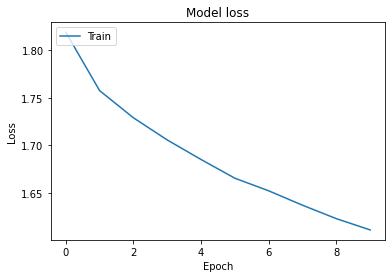

Total Training Time is (s): 
8.860853433609009
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.33927457507895326, 'optimizer': 'sgd'}
Accuracy: 
0.3861799944606323
----------------------------------------------------
 20%|██        | 5/25 [00:57<03:53, 11.66s/it, best loss: -0.45277235999715865]

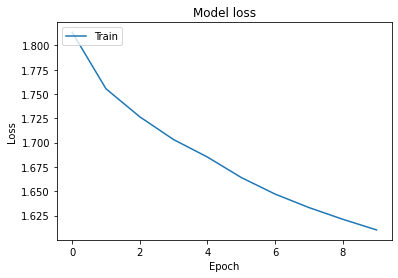

Total Training Time is (s): 
8.886514663696289
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.3383278192342153, 'optimizer': 'sgd'}
Accuracy: 
0.38255781558072144
----------------------------------------------------
 24%|██▍       | 6/25 [01:07<03:31, 11.12s/it, best loss: -0.45277235999715865]

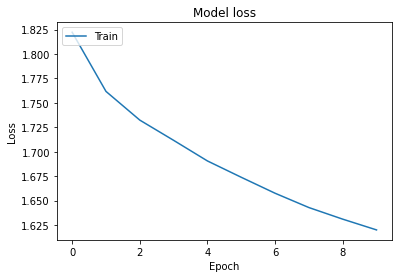

Total Training Time is (s): 
8.659630537033081
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.46576279765778017, 'optimizer': 'sgd'}
Accuracy: 
0.38785176930337206
----------------------------------------------------
 28%|██▊       | 7/25 [01:17<03:11, 10.66s/it, best loss: -0.45277235999715865]

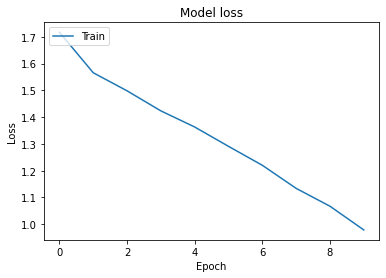

Total Training Time is (s): 
11.21085524559021
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.3421983737582417, 'optimizer': 'Adam'}
Accuracy: 
0.4516578434145726
----------------------------------------------------
 32%|███▏      | 8/25 [01:29<03:09, 11.14s/it, best loss: -0.45277235999715865]

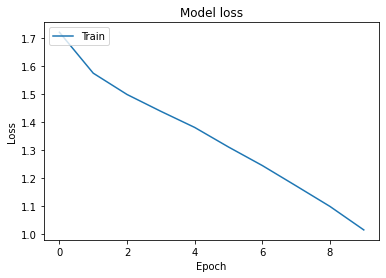

Total Training Time is (s): 
10.884218215942383
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.38642777139063234, 'optimizer': 'Adam'}
Accuracy: 
0.46140986348002294
----------------------------------------------------
 36%|███▌      | 9/25 [01:41<03:02, 11.38s/it, best loss: -0.46140986348002294]

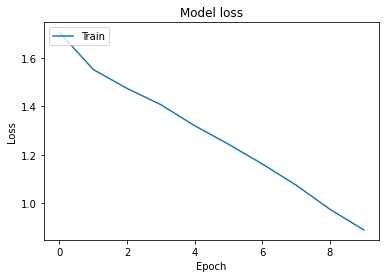

Total Training Time is (s): 
11.129983186721802
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.2114175460016965, 'optimizer': 'Adam'}
Accuracy: 
0.45528002229448344
----------------------------------------------------
 40%|████      | 10/25 [01:53<02:54, 11.63s/it, best loss: -0.46140986348002294]

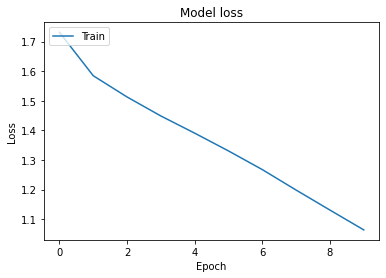

Total Training Time is (s): 
11.016093492507935
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.4144149185423497, 'optimizer': 'Adam'}
Accuracy: 
0.43187517414736726
----------------------------------------------------
 44%|████▍     | 11/25 [02:05<02:44, 11.78s/it, best loss: -0.46140986348002294]

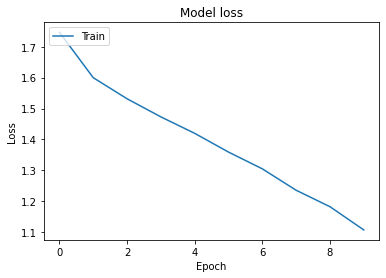

Total Training Time is (s): 
11.45296573638916
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.49848209360058704, 'optimizer': 'Adam'}
Accuracy: 
0.4438562273945972
----------------------------------------------------
 48%|████▊     | 12/25 [02:18<02:36, 12.03s/it, best loss: -0.46140986348002294]

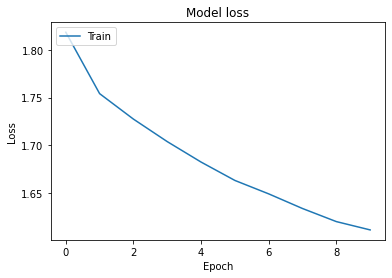

Total Training Time is (s): 
8.911175727844238
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.34752096322215864, 'optimizer': 'sgd'}
Accuracy: 
0.3811646698327674
----------------------------------------------------
 52%|█████▏    | 13/25 [02:28<02:16, 11.41s/it, best loss: -0.46140986348002294]

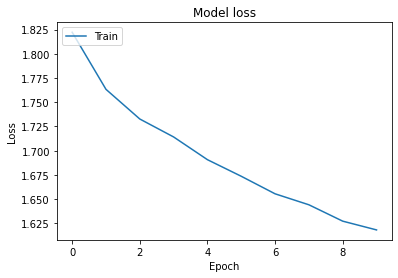

Total Training Time is (s): 
9.253771781921387
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.423862661812775, 'optimizer': 'sgd'}
Accuracy: 
0.3825578155558101
----------------------------------------------------
 56%|█████▌    | 14/25 [02:38<02:02, 11.11s/it, best loss: -0.46140986348002294]

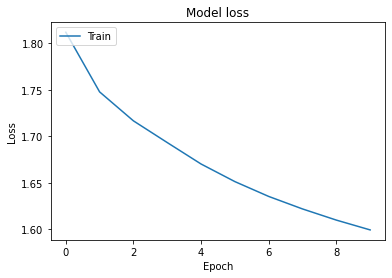

Total Training Time is (s): 
9.348626136779785
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.1541104638061905, 'optimizer': 'sgd'}
Accuracy: 
0.38590136531602376
----------------------------------------------------
 60%|██████    | 15/25 [02:49<01:48, 10.89s/it, best loss: -0.46140986348002294]

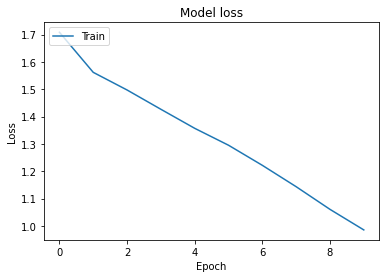

Total Training Time is (s): 
11.3615140914917
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.3327219796528025, 'optimizer': 'Adam'}
Accuracy: 
0.44246308167155457
----------------------------------------------------
 64%|██████▍   | 16/25 [03:01<01:42, 11.39s/it, best loss: -0.46140986348002294]

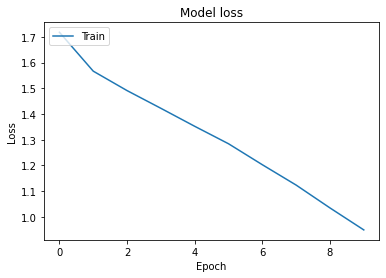

Total Training Time is (s): 
11.617588996887207
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.2906404037880135, 'optimizer': 'Adam'}
Accuracy: 
0.46140986348002294
----------------------------------------------------
 68%|██████▊   | 17/25 [03:14<01:34, 11.84s/it, best loss: -0.46140986348002294]

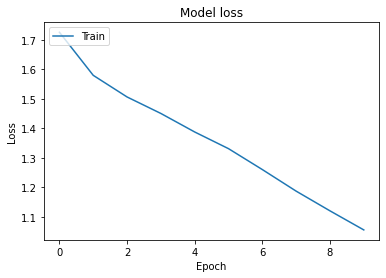

Total Training Time is (s): 
11.62356162071228
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.443008539318299, 'optimizer': 'Adam'}
Accuracy: 
0.44357759822507725
----------------------------------------------------
 72%|███████▏  | 18/25 [03:27<01:25, 12.15s/it, best loss: -0.46140986348002294]

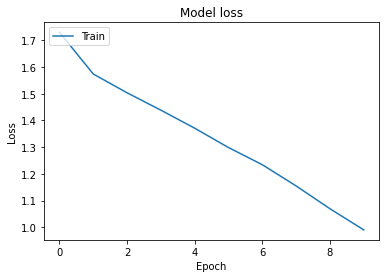

Total Training Time is (s): 
11.430009126663208
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.35017952294444366, 'optimizer': 'Adam'}
Accuracy: 
0.4591808303231547
----------------------------------------------------
 76%|███████▌  | 19/25 [03:40<01:13, 12.31s/it, best loss: -0.46140986348002294]

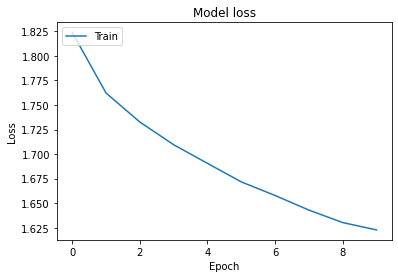

Total Training Time is (s): 
9.244823694229126
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.49306378358005676, 'optimizer': 'sgd'}
Accuracy: 
0.3884090275925891
----------------------------------------------------
 80%|████████  | 20/25 [03:50<00:58, 11.74s/it, best loss: -0.46140986348002294]

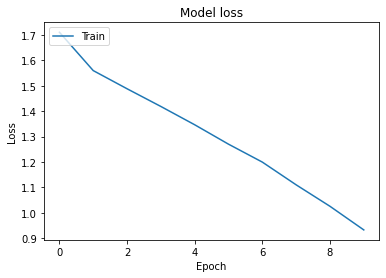

Total Training Time is (s): 
11.604687452316284
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.26437395217590065, 'optimizer': 'Adam'}
Accuracy: 
0.4524937308483982
----------------------------------------------------
 84%|████████▍ | 21/25 [04:03<00:48, 12.10s/it, best loss: -0.46140986348002294]

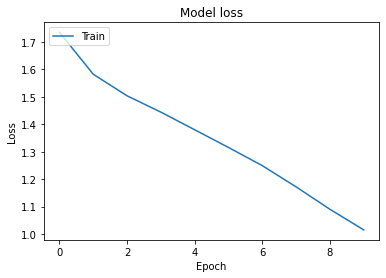

Total Training Time is (s): 
12.24178171157837
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.389366765379075, 'optimizer': 'Adam'}
Accuracy: 
0.44106993591944865
----------------------------------------------------
 88%|████████▊ | 22/25 [04:17<00:37, 12.55s/it, best loss: -0.46140986348002294]

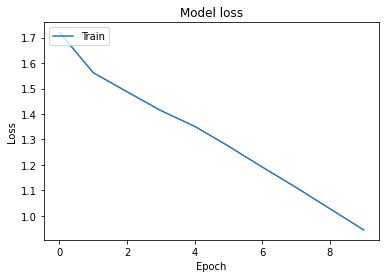

Total Training Time is (s): 
12.225438833236694
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.270984623168504, 'optimizer': 'Adam'}
Accuracy: 
0.4558372805878524
----------------------------------------------------
 92%|█████████▏| 23/25 [04:30<00:25, 12.87s/it, best loss: -0.46140986348002294]

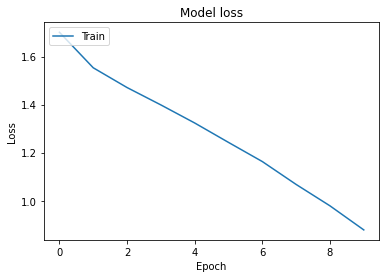

Total Training Time is (s): 
12.199180364608765
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.20416912913287671, 'optimizer': 'Adam'}
Accuracy: 
0.42992477016417086
----------------------------------------------------
 96%|█████████▌| 24/25 [04:44<00:13, 13.14s/it, best loss: -0.46140986348002294]

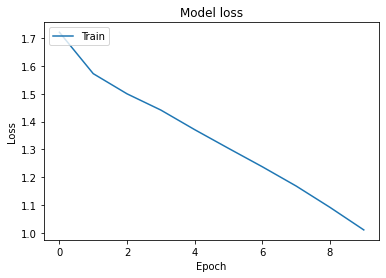

Total Training Time is (s): 
12.108391523361206
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.38119691690340807, 'optimizer': 'Adam'}
Accuracy: 
0.4550013931540268
----------------------------------------------------
100%|██████████| 25/25 [04:57<00:00, 11.92s/it, best loss: -0.46140986348002294]
Best Hyperparameters {'activation_fn': 0, 'dropout_prob': 0.38642777139063234, 'optimizer': 0}
3589/3589 [==============================] - 0s 73us/step
Test Accuracy:  0.45611590973246097


In [0]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

#MODEL 1
#Define a Feed-Forward Model with 2 hidden layers with dimensions 392 and 196 Neurons
def optimize_fnn(hyperparameter):
  model = Sequential([
    Dense(2304, activation=hyperparameter['activation_fn'], input_shape=(48*48,), name="first_hidden_layer",),
    Dense(2304//2, activation=hyperparameter['activation_fn'], name="second_hidden_layer",),Dropout(hyperparameter['dropout_prob']),
    Dense(7, activation='softmax'),
  ])
  #  Validate your Model Architecture
  #print(model1.summary())
  model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)
  time_callback = TimeHistory()
  hist = model.fit(train_image_array, to_categorical(train_labels), epochs=10, batch_size=256,verbose=0,callbacks=[time_callback])
  plt.plot(hist.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper left')
  plt.show()
  print("Total Training Time is (s): ", sum(time_callback.times))

  performance = model.evaluate(valid_image_array, to_categorical(valid_labels), verbose=0)
  
  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":model})

# Define search space for hyper-parameters
space = {
    # The activation_fn choices:
    'activation_fn':hp.choice('activation_fn',['relu']),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.5),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

best = fmin(
        optimize_fnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=25,
    )

print("========================================================================")
print("Best Hyperparameters", best)

# You can retrain the final model with optimal hyperparameters on train+validation data

# Or you can use the model returned directly
# Find trial which has minimum loss value and use that model to perform evaluation on the test data
test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(test_image_array, to_categorical(test_labels))

print("==================================")
print("Test Accuracy: ", performance[1])



#CNNs


In [0]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

# Flatten the images into vectors (1D) for feed forward network
train_images_3d = train_image_array.reshape((len(train_image_array),48,48,1))
test_images_3d = test_image_array.reshape((len(test_image_array), 48,48,1))
valid_images_3d = valid_image_array.reshape((len(valid_image_array), 48,48,1))

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(64, kernel_size=(3,3), strides=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(64, kernel_size=(3,3), activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.3),
            Conv2D(128, kernel_size=3, activation='relu'),
            Conv2D(128, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.3), Flatten(),]

classifier = [Dense(512, activation='relu'), Dense(7, activation='relu'),]
cnn_model = Sequential(common_features+classifier)
print(cnn_model.summary())
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)      

In [0]:
# Train model
cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=256,)

performance = cnn_model.evaluate(valid_images_3d, to_categorical(valid_labels))
print("Accuracy on Test samples: {0}".format(performance[1]))

Epoch 1/10
28709/28709 [==============================] - 8s 267us/step - loss: 3.0070 - acc: 0.2040
Epoch 2/10
28709/28709 [==============================] - 1s 46us/step - loss: 1.9766 - acc: 0.2513
Epoch 3/10
28709/28709 [==============================] - 1s 44us/step - loss: 1.9749 - acc: 0.2513
Epoch 4/10
28709/28709 [==============================] - 1s 46us/step - loss: 1.9732 - acc: 0.2513
Epoch 5/10
28709/28709 [==============================] - 1s 45us/step - loss: 1.9713 - acc: 0.2513
Epoch 6/10
28709/28709 [==============================] - 1s 46us/step - loss: 1.9694 - acc: 0.2513
Epoch 7/10
 6656/28709 [=====>........................] - ETA: 0s - loss: 1.9895 - acc: 0.2498

KeyboardInterrupt: ignored

In [0]:
def optimize_cnn(hyperparameter):
  
  # Define model using hyperparameters 
  cnn_model = Sequential([Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']), 
            Flatten(),
            Dense(512, activation='relu'), 
            Dense(7, activation='softmax'),])
  
  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)
  time_callback = TimeHistory()
  hist = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=256, verbose=0,callbacks=[time_callback])
  # print(hist.history.accuracy)
  print("Total Training Time is (s): ", sum(time_callback.times))
  # Evaluate accuracy on validation data
  performance = cnn_model.evaluate(valid_images_3d, to_categorical(valid_labels), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})


# Define search space for hyper-parameters
space = {
    # The kernel_size for convolutions:
    'conv_kernel_size': hp.choice('conv_kernel_size', [1, 3, 5]),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

# Find the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=25,
    )

print("==================================")
print("Best Hyperparameters", best)

# You can retrain the final model with optimal hyperparameters on train+validation data

# Or you can use the model returned directly
# Find trial which has minimum loss value and use that model to perform evaluation on the test data
test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(test_images_3d, to_categorical(test_labels))

print("==================================")
print("Test Accuracy: ", performance[1])

Total Training Time is (s): 
28.2460458278656
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.14668735307891242, 'optimizer': 'sgd'}
Accuracy: 
0.3399275564265537
----------------------------------------------------
Total Training Time is (s): 
23.3261399269104
Hyperparameters: 
{'conv_kernel_size': 1, 'dropout_prob': 0.17386172811548062, 'optimizer': 'sgd'}
Accuracy: 
0.3265533575144077
----------------------------------------------------
Total Training Time is (s): 
29.898162126541138
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.16029133971157797, 'optimizer': 'Adam'}
Accuracy: 
0.5770409585174726
----------------------------------------------------
Total Training Time is (s): 
28.340755224227905
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.19075674893547134, 'optimizer': 'sgd'}
Accuracy: 
0.3558094176692397
----------------------------------------------------
Total Training Time is (s): 
28.23865532875061
Hyperparameters: 
{'conv_kernel_size

KeyboardInterrupt: ignored

#FINE TUNING

In [0]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input
 #Load MNISt dataset
(train_imagesf, train_labelsf), (test_imagesf, test_labelsf) = mnist.load_data()
train_imagesf = (train_imagesf / 255) - 0.5
test_imagesf = (test_imagesf / 255) - 0.5

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images_3df = train_imagesf.reshape(60000,28,28,1)
test_images_3df = test_imagesf.reshape(10000,28,28,1)
train_images_3df = train_images_3df[:28709]
train_labelsf = train_labelsf[:28709]
test_images_3df = test_images_3df[:3589]
test_labelsf = test_labelsf[:3589]

Base_feature_model = Sequential([Conv2D(32, kernel_size=3, activation='relu'), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25), 
            Dense(512, activation='relu'), Flatten(),])

# Define task-specific classifiation layers
Classifier_mnist = Dense(10, activation='softmax', name='MNIST')
Classifier_fer = Dense(7, activation='softmax', name='FER')

# Instantiate a Tensor to feed Input (Input Layer)
mnist_input = Input(shape=(28,28,1))
fer_input = Input(shape=(48,48,1))

# Call Base_feature_model over the mnist images
mnist_features = Base_feature_model(mnist_input)

# Call Base_feature_model over the fashion-mnist images
fer_features = Base_feature_model(fer_input)

# Call mnist_prediction layer over the mnist images
# mnist_prediction represents the predicted output for mnist dataset
mnist_prediction = Classifier_mnist(mnist_features)

# Call fashion_mnist_prediction layer over the mnist images
# fashion_mnist_prediction represents the predicted output for fashion-mnist dataset
fer_prediction = Classifier_fer(fer_features)


joint_model = Model(inputs=[mnist_input, fer_input], 
                    outputs=[mnist_prediction, fer_prediction])

print(joint_model.summary())

joint_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'],)  # Using adam optimizer for faster convergence

joint_model.fit([train_images_3df, train_images_3d], 
                [to_categorical(train_labelsf), to_categorical(train_labels)], 
                epochs=2, batch_size=1024,)
performance = joint_model.evaluate([test_images_3df, valid_images_3d], 
                                   [to_categorical(test_labelsf), 
                                    to_categorical(valid_labels)], verbose=1)

print("===\nMNIST Accuracy: {0}\nFER Accuracy: {1}".format(performance[3], performance[4]))
performance = joint_model.evaluate([test_images_3df, test_images_3d], 
                                   [to_categorical(test_labelsf), 
                                    to_categorical(test_labels)], verbose=1)

print("===\nMNIST Accuracy: {0}\nFER Accuracy: {1}".format(performance[3], performance[4]))

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
sequential_38 (Sequential)      multiple             98272       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
MNIST (Dense)                   (None, 10)           81930       sequential_38[1][0]        

#Fine tuning using the MNIST Model.





In [0]:
import cv2
from skimage.transform import resize
# Resizing the images. 
flatten_train_images = train_image_array.reshape((-1, 48,48))
flatten_test_images = test_image_array.reshape((-1, 48,48))
flatten_valid_images = valid_image_array.reshape((-1,48,48))
resized_images_train = []
resized_images_test = []
resized_images_valid = []
# for i in range(len(flatten_test_images)):
for i in range(len(train_pixels)):
  img = flatten_train_images[i]
  img=cv2.resize(img, dsize=(28,28),interpolation=cv2.INTER_CUBIC)
  resized_images_train.append(img)
resized_images_train = np.array(resized_images_train)

for i in range(len(valid_pixels)):
  img = flatten_valid_images[i]
  img=cv2.resize(img, dsize=(28,28),interpolation=cv2.INTER_CUBIC)
  resized_images_valid.append(img)
resized_images_valid = np.array(resized_images_valid)


for i in range(len(test_pixels)):
  img = flatten_test_images[i]
  img=cv2.resize(img, dsize=(28,28),interpolation=cv2.INTER_CUBIC)
  resized_images_test.append(img)
resized_images_test = np.array(resized_images_test)


In [0]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25), Flatten(),]
classifier = [Dense(512, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3df = train_imagesf.reshape(60000,28,28,1)
test_images_3df = test_imagesf.reshape(10000,28,28,1)

cnn_model.fit(train_images_3df, to_categorical(train_labelsf), epochs=10, batch_size=256,)
performance = cnn_model.evaluate(test_images_3df, to_categorical(test_labelsf))

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)        

In [0]:
for l in common_features:
  l.trainable = False

classifier2 = [Dense(512, activation='relu'), Dense(7, activation='softmax'),]

cnn_model.add(Dense(7,activation='softmax'))
print(cnn_model.summary())
resized_images_valid_3d = resized_images_valid.reshape(3589,28,28,1)
resized_images_train_3d = resized_images_train.reshape(28709,28,28,1)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

cnn_model.fit(resized_images_train_3d, to_categorical(train_labels), epochs=8, batch_size=256,)
performance = cnn_model.evaluate(resized_images_valid_3d, to_categorical(valid_labels))

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)         